In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from commando import ComManDo

2021-10-25 21:03:48.786888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-25 21:03:48.786923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod2.h5ad')

In [3]:
X1 = data_mod1.X
X2 = data_mod2.X

# Run Mapping

In [4]:
commando_out = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=1000,
        epoch_pd_large=2000,
        log_pd=1000,
        two_step_num=500,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (22463, 13431)
Dataset 1: (22463, 116490)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating intra-group F #1
epoch:[1000/1000] err:1.0017 alpha:0.9331
Calculating intra-group F #2
epoch:[1000/1000] err:0.9109 alpha:0.9544
Calculating intra-group F #3
epoch:[1000/1000] err:0.8170 alpha:0.9583
Calculating intra-group F #4
epoch:[1000/1000] err:0.8042 alpha:0.9607
Calculating intra-group F #5
epoch:[1000/1000] err:0.7835 alpha:0.9630
Calculating intra-group F #6
epoch:[1000/1000] err:0.7948 alpha:0.9610
Calculating intra-group F #7
epoch:[1000/1000] err:0.7667 alpha:0.9613
Calculating intra-group F #8
epoch:[1000/1000] err:0.7719 alpha:0.9622
Calculating intra-group F #9
epoch:[1000/1000] err:0.7706 alpha:0.9631
Calculating intra-group F #10
epoch:[1000/1000] err:0.7777 alpha:0.9617
Calculating intra-group F #11
epoch:[1000/1000] err:0.7321 alpha:0.9645
Calculating intra-group F #

# Evaluate

ComManDo Pairwise Error: 1.0510930607723128


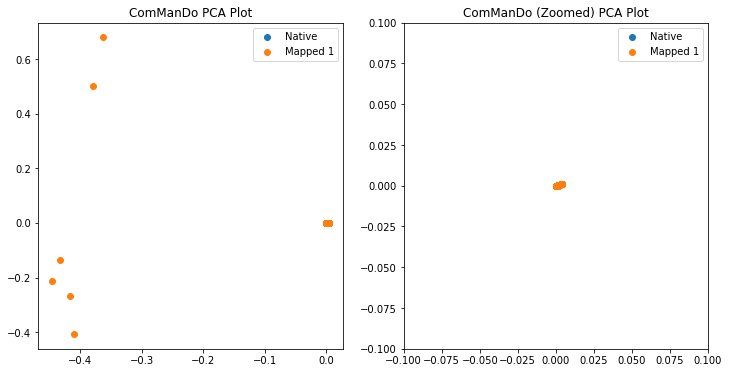

In [5]:
print('ComManDo Pairwise Error: ' + str(pairwise_error(*commando_out, normalize_by_feature=True)))

plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
alignment_visualize(*commando_out, alg_name='ComManDo')

plt.subplot(1, 2, 2)
plt.axis([-.1, .1, -.1, .1])
alignment_visualize(*commando_out, alg_name='ComManDo (Zoomed)')